In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/df_indi_works.csv', index_col = [0])
#data = data[data["count_works"].isin({0, 1, 2})]  # Not more ?
data['count_works'][data['count_works']==0] = 1


regions = pd.read_csv(
    "../data/ENS - Cultural Index - Countries Databases - region_level.csv"
)

regions = regions[regions['region_name']!='Eastern Europe']

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_53622/2788296717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count_works'][data['count_works']==0] = 1


In [2]:

regions["region_name"][regions["region_name"] == "Slav world"] = "East Slavic"

regions = regions[regions["level"] == 2]
regions = set(regions["region_name"])
df = data[data["region_name"].isin(regions)]
#df = df[df['decade']<=1870]

In [4]:
df[df['region_name']=='Korea']

,individual_wikidata_id,decade,individual_name,score,region_name,count_works
0,Q496891,1570,Seong Hon,13,Korea,1.0
2944,Q484883,1640,Heo Jeok,2,Korea,1.0
5781,Q497114,1650,Kim Ikhun,2,Korea,1.0
6814,Q12584053,1570,Go Gyeong-myeong,8,Korea,1.0
18970,Q488377,650,Jindeok of Silla,1,Korea,1.0
...,...,...,...,...,...,...
504135,Q469396,1380,Jeong Do-jeon,16,Korea,2.0
506180,Q626748,1440,Jeong Chang-son,1,Korea,1.0
508467,Q16178036,1860,Kang Wi,12,Korea,1.0
508876,Q6408679,730,Kim Gyo-gak,1,Korea,1.0


In [5]:
df['count_works'].value_counts()

count_works
1.0      116560
2.0        5104
3.0        2928
4.0        2033
5.0        1458
          ...  
257.0         1
627.0         1
443.0         1
383.0         1
599.0         1
Name: count, Length: 476, dtype: int64

In [15]:
df_f0 = df[df['count_works']==1]
total_f0 = df_f0.groupby('region_name')['individual_wikidata_id'].count().rename('count_works')
total_f0

region_name
Arabic world         1242
Balkans              1383
Central Europe       8769
Chinese world        1506
East Slavic          3845
France              17838
German world        32602
Greek World          1331
Indian world          392
Italy               14465
Japan                1201
Korea                 197
Latin World           314
Low countries        7823
Nordic countries     5851
Persian world         485
Portugal              802
Spain                5157
United Kingdom      11357
Name: count_works, dtype: int64

<Axes: xlabel='region_name'>

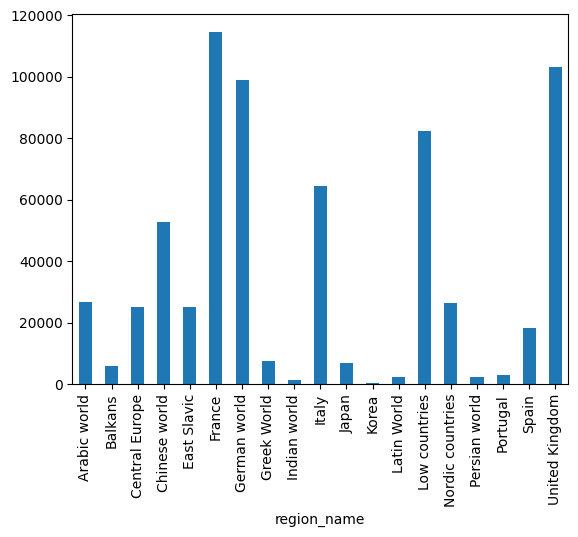

In [26]:
total_counts = df.groupby('region_name')['count_works'].sum()
total_counts.plot(kind='bar')

In [18]:
final = 1-(total_f0 / total_counts)
final = final.reset_index()
final = final.rename(columns={'count_works': 'coverage'})
final = final.sort_values(by='coverage', ascending=True)

,region_name,coverage
11,Korea,0.306338
2,Central Europe,0.648241
6,German world,0.670840
17,Spain,0.716664
8,Indian world,0.722968
16,Portugal,0.729054
1,Balkans,0.764956
9,Italy,0.775538
14,Nordic countries,0.777993
15,Persian world,0.782511


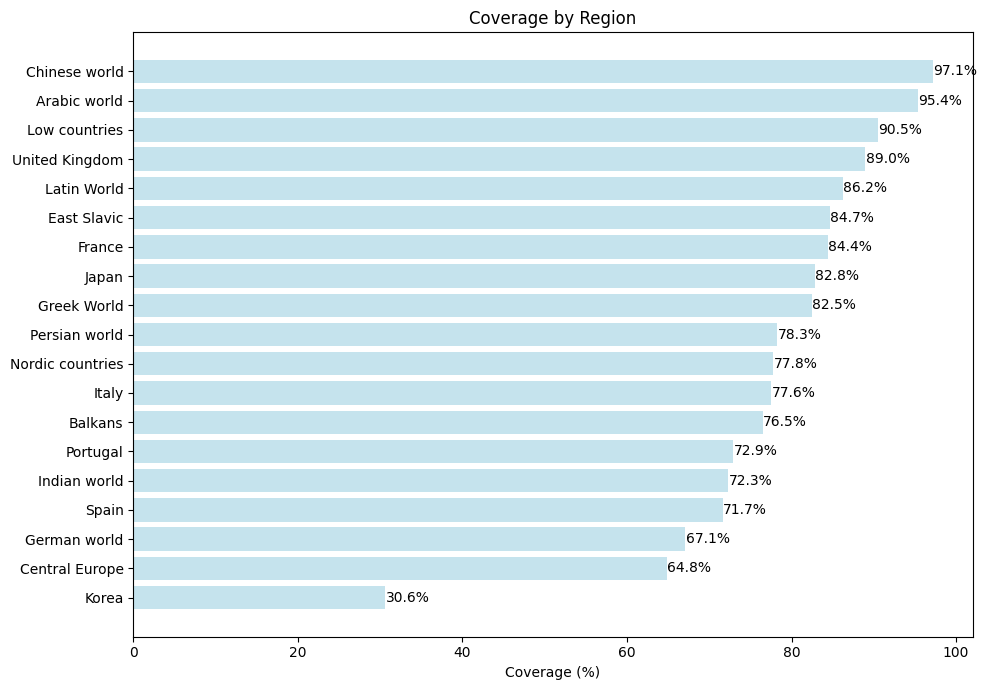

In [19]:

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(final['region_name'], final['coverage']*100, color='lightblue', alpha=0.7)

ax.set_xlabel('Coverage (%)')
ax.set_ylabel('')
ax.set_title('Coverage by Region')

# Add values at the end of each bar
for bar in bars:
    width = bar.get_width()
    label = f'{width:.1f}%'
    x_pos = width + 0.05
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(x_pos, y_pos, label, ha='left', va='center')
plt.tight_layout()
plt.show()